# Reasoning

Reasonings from **Graph-theoretic**, **Ontology Based Expert System** and **CBR Expert System** using Python

Common ways to represent a graph include:
- Adjacency Matrix <br>
- Adjacency List <br>
- NetworkX (Python library) <br>
- RDF with OWL-RL (Python library)

### Adjacency Matrix
This allows constant-time checks to see if two nodes are directly connected, but it requires more memory when dealing with large graphs.

In [ ]:
graph = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]

### Adjacency List
This is generally more efficient for sparse graphs, where most nodes are not connected to each other.

In [ ]:
graph = {
    'A': ['B','C'],
    'B': ['A','C'],
    'C': ['A','B']
}

### NetworkX

<img src=attachment:c415f39d-c769-437d-af05-5918cdd89680.png>
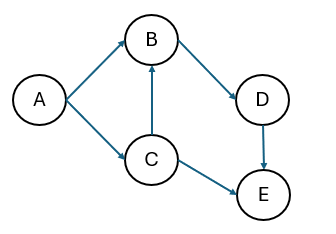

In [ ]:
import networkx as nx

G = nx.Graph()
G.add_edges_from([('A','B'), ('A','C'), ('C','B'), ('B','D'),('D','E'), ('C','E')])

print(nx.shortest_path(G, source='A', target='E'))

### Ontology Based Expert System

In [ ]:
# pip install rdflib owlrl

RDF as knowledge base

In [ ]:
from rdflib import Graph, Namespace, RDF, RDFS, Literal, BNode
from rdflib.namespace import OWL, XSD 

# Create an RDF graph
g = Graph()

# Define a namespace
EX = Namespace("nm")

# Add Classes
g.add((EX.Animal, RDF.type, RDFS.Class))
g.add((EX.Mammal, RDF.type, RDFS.Class))
g.add((EX.Cat, RDF.type, RDFS.Class))

# Add Parent-Child Classes
g.add((EX.Mammal, RDFS.subClassOf, EX.Animal))
g.add((EX.Cat, RDFS.subClassOf, EX.Mammal))

# Add Properties to Class
g.add((EX.hasTail, RDF.type, RDF.Property))
g.add((EX.hasTail, RDFS.domain, EX.Mammal))
g.add((EX.hasTail, RDFS.range, RDFS.Literal))

# Add Instances
g.add((EX.Garfield, RDF.type, EX.Cat))
g.add((EX.Garfield, EX.hasTail, Literal(True, datatype=XSD.boolean)))

# Add Relations
g.add((EX.Garfield, OWL.differentFrom, EX.ThunderCat))

# Add Constraints
restriction = BNode()
g.add((restriction, RDF.type, OWL.Restriction))
g.add((restriction, OWL.onProperty, EX.hasTail))
g.add((restriction, OWL.hasValue, Literal(True, datatype=XSD.boolean)))
g.add((EX.Cat, RDFS.subClassOf, restriction))

print(g.serialize(format="turtle"))


#### Reasoning through OWL-RL

In [ ]:
from owlrl import DeductiveClosure, OWLRL_Semantics

# Before reasoning
print("\n----Before reasoning----")
for s, p, o in g.triples((None, RDF.type, None)):
    if str(s).startswith(str(EX)):
        print(f"{s} rdf:type {o}")
        
# Deduce reasoning
DeductiveClosure(OWLRL_Semantics).expand(g)

# After reasoning
print("\n----After reasoning----")
for s, p, o in g.triples((None, RDF.type, None)):
    if str(s).startswith(str(EX)):
        print(f"{s} rdf:type {o}")

### CBR Expert System

In [ ]:
# pip install CountVectorizer

- Case Base Reasoning

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

class CBR_ES:
    def __init__(self):
        self.problems = []           # problem text
        self.solutions = []          # solution text
        self.vectorizer = CountVectorizer()
        self.matrix = None

    # Retain
    def retain(self, problem, solution):
        self.problems.append(problem)
        self.solutions.append(solution)

    # Build BoW matrix after adding cases
    def finalize(self):
        if len(self.problems) == 0:
            return
        self.matrix = self.vectorizer.fit_transform(self.problems)

    # Retrieve
    def retrieve(self, query_problem):
        q_vec = self.vectorizer.transform([query_problem])
        sims = cosine_similarity(q_vec, self.matrix)[0]
        idx = np.argmax(sims)
        return idx, sims[idx], sims

    # Reuse
    def reuse(self, idx):
        return self.solutions[idx]

    # Revise
    def revise(self, solution, feedback=None):
        return solution if feedback is None else feedback

    # display all cases
    def show_cases(self):
        for p, s in zip(self.problems, self.solutions):
            print(f"Problem: {p}\nSolution: {s}\n")


- Main Program

In [ ]:
cbr = CBR_ES()
cbr.retain("Computer is black out", "Ask user to check power cable.")
cbr.retain("Forgot password", "Ask user to reset password.")
cbr.retain("System is hang", "Ask user to restart the system.")
cbr.retain("Mouse didn't moving", "Ask user to replace a new mouse.")
cbr.finalize()

query = "User lost his password"
idx, score, scores = cbr.retrieve(query)
print("All similarities:", scores)
print("Best index:", idx)
retrieved_solution = cbr.reuse(idx)
print("\nRetrieved solution:", retrieved_solution)

# Revise & Update
cbr.retain(query, "Revise:" + retrieved_solution )
cbr.finalize()

#cbr.show_cases()